## 1) Data

In [1]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [2]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [3]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [4]:
chars = sorted(list(set(text)))   # unique chars
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [5]:
# tokenize: convert raw text as string to some
# sequence of integers.


# lookup table: mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))


## google uses sentencepiece(sub-word units),
## openai uses tiktoken

## trade-off: code book size - sequence lengths:
## long seq of integers <=> small vocabs
## short seq of integers <=> large vocabs



[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [6]:
print(stoi)
print(itos)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}
{0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: "'", 6: ',', 7: '-', 8: '.', 9: '3', 10: ':', 11: ';', 12: '?', 13: 'A', 14: 'B', 15: 'C', 16: 'D', 17: 'E', 18: 'F', 19: 'G', 20: 'H', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'M', 26: 'N', 27: 'O', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T', 33: 'U', 34: 'V', 35: 'W', 36: 'X', 37: 'Y', 38: 'Z', 39: 'a', 40: 'b', 41: 'c', 42: 'd', 43: 'e', 44: 'f', 45: 'g', 46: 'h', 47: 'i',

In [7]:
import torch
encoded_texts = encode(text)
data = torch.tensor(encoded_texts, dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [8]:
n = int(0.9*len(data)) # first 90% will be train, rest val
print(f"{n} + {int(0.1*len(data))} = {len(data)}")
train_data = data[:n]
val_data = data[n:]

1003854 + 111539 = 1115394


In [9]:
# train just chunks (max length)
block_size = 8
train_data[:block_size+1]

### simultaneously predict every one of these characters
###

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [10]:
x = train_data[:block_size]     # input to transformer
y = train_data[1:block_size+1]  # next block size characters
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")


# context 1
# ...
# context 8 (block size)


when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [11]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data


    # random positions to get chunk == random offset into the training set
    ix = torch.randint(len(data) - block_size, (batch_size,))

    # torch stack ==> makes them row by row
    # one dim tensor ==> 4x8 tensor
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('(X)inputs:')
print(xb.shape)
print(xb)
print('(Y)targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension (row)
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

(X)inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
(Y)targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [

In [12]:
print(xb) # our input to the transformer

## simplest NN model in language modeling = bigram lang model

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


In [13]:
# # import torch
# # import torch.nn as nn
# # from torch.nn import functional as F
# # torch.manual_seed(1337)

# # class BigramLanguageModel(nn.Module):

# #     def __init__(self, vocab_size):
# #         super().__init__()
# #         # each token directly reads off the logits for the next token from a lookup table
# #         # table dimension: vocab_size x vocab_size
# #         print("constructor vocab size:", vocab_size)
# #         self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

# #     def forward(self, idx, targets=None):

# #         #### 1) get logits
# #         # idx and targets are both (B,T) tensor of integers
# #         # (B,T,C) batch=4---time=8---channel=vocab size=65
# #         # idx: mapping into xb
# #         # get prediction scores for every one of the 4x8 positions
# #         logits = self.token_embedding_table(idx) # (B,T,C): batch, time, channel


# #         #### 2) negative log likelihood
# #         # originally, cross entropy func expects (B,C,T) tensor
# #         # shape is needed:
# #         B, T, C = logits.shape                   # [4, 8, 65]
# #         print("logits initial:",logits.shape)

# #         # convert logits to one dimension sequence,
# #         # then preserve channel dim. (2nd dim)
# #         logits = logits.view(B*T, C)             # [32, 65]
# #         print("logits final:",logits.shape)

# #         # convert targets to one dimension sequence,
# #         print("targets initial:",targets.shape)  # [4, 8]
# #         targets = targets.view(B*T)
# #         print("targets final:",targets.shape)    # [32]

# #         loss = F.cross_entropy(logits, targets)  # [32, 65] vs [32]

# #         return logits, loss

# # m = BigramLanguageModel(vocab_size)
# # print("xb shape:", xb.shape)
# # print("yb shape:", yb.shape)


# # logits, loss = m(xb, yb)

# # print()
# # print(logits.shape)       # torch.Size([4, 8, 65])
# # print(loss)               # we expect -ln(1/65)=4.1...


+Generation module

In [14]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        # table dimension: vocab_size x vocab_size
        print("constructor vocab size:", vocab_size)
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        #### 1) get logits
        # idx and targets are both (B,T) tensor of integers
        # (B,T,C) batch=4---time=8---channel=vocab size=65
        # idx: mapping into xb
        # get prediction scores for every one of the 4x8 positions
        logits = self.token_embedding_table(idx) # (B,T,C): batch, time, channel


        if targets is None:
            loss = None
        else:
            #### 2) negative log likelihood
            # originally, cross entropy func expects (B,C,T) tensor
            # shape is needed:
            B, T, C = logits.shape                   # [4, 8, 65]

            # convert logits to one dimension sequence,
            # then preserve channel dim. (2nd dim)
            logits = logits.view(B*T, C)             # [32, 65]

            # convert targets to one dimension sequence,
            targets = targets.view(B*T)              # [4, 8] --> [32]
            loss = F.cross_entropy(logits, targets)  # [32, 65] vs [32]

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context for a batch
        # takes B,T and extend to B,T+1 ---> T+2 --> ...
        #                         B+1,T+1 --> T+2 --> ...


        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)

            # focus only on the last time step: pred
            logits = logits[:, -1, :] # becomes (B, C)

            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)

            # sample from the distributi  on
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)

            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # crates (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print()
# print(logits.shape)       # torch.Size([4, 8, 65])
print(loss)               # we expect -ln(1/65)=4.1...


IDX = torch.zeros((1, 1), dtype=torch.long)  # first char: newline char
print(decode(m.generate(idx = IDX,
                        max_new_tokens=100)[0].tolist()))


constructor vocab size: 65

tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


Train Model

In [15]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [16]:
batch_size = 32
for steps in range(1000):

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)   # zero grads for prev step
    loss.backward()                         # get grads for all params
    optimizer.step()                        # update params

print(loss.item())

3.7218432426452637


In [17]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long),
                        max_new_tokens=500)[0].tolist()))


olylvLLko'TMyatyIoconxad.?-tNSqYPsx&bF.oiR;BD$dZBMZv'K f bRSmIKptRPly:AUC&$zLK,qUEy&Ay;ZxjKVhmrdagC-bTop-QJe.H?x
JGF&pwst-P sti.hlEsu;w:w a BG:tLhMk,epdhlay'sVzLq--ERwXUzDnq-bn czXxxI&V&Pynnl,s,Ioto!uvixwC-IJXElrgm C-.bcoCPJ
IMphsevhO AL!-K:AIkpre,
rPHEJUzV;P?uN3b?ohoRiBUENoV3B&jumNL;Aik,
xf -IEKROn JSyYWW?n 'ay;:weO'AqVzPyoiBL? seAX3Dot,iy.xyIcf r!!ul-Koi:x pZrAQly'v'a;vEzN
BwowKo'MBqF$PPFb
CjYX3beT,lZ qdda!wfgmJP
DUfNXmnQU mvcv?nlnQF$JUAAywNocd  bGSPyAlprNeQnq-GRSVUP.Ja!IBoDqfI&xJM AXEHV&DKvRS


Math trick in self-attention

In [18]:
### we want tokens to talk each other

# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
B,T,C = 4,8,2
x = torch.randn(B,T,C)      # torch.Size([4, 8, 2])
print(x.shape)


### how to communicate with past:
### way-1: average of all preceding elements
### ex: 5th token, get info channels from 4th, 3rd, 2nd, 1st step
### average them --> summarizes current token, in context of its history

# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))

print("xbow shape:", xbow.shape)
print("x shape:", x.shape)
for b in range(B):
    for t in range(T):

        xprev = x[b,0:t+1] # (t,C)       x[b,:t+1] == x[b,0:t+1]
        # print(f"b:[{b}] t:[{t}] xprev s:",xprev.shape)  # torch.Size([0...t, 2])

        xbow[b,t] = torch.mean(xprev, 0)                # torch.Size([2])
        # print(f"b:[{b}] t:[{t}] xprev s:",xbow[b,t].shape)



torch.Size([4, 8, 2])
xbow shape: torch.Size([4, 8, 2])
x shape: torch.Size([4, 8, 2])


In [19]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)     # avr weights for main matrix
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [20]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [21]:
# version 2: using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)

# (T, T) @ (B, T, C) ----> (B, T, C)
# dim mismatch --> PyTorch creates Batch dim for wei:
# (B, T, T) @ (B, T, C) ----> (B, T, C)

xbow2 = wei @ x
torch.allclose(xbow, xbow2)

True

In [22]:
tril = torch.tril(torch.ones(T, T))
print(tril)
print()


wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
print(wei)
print()


tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])



In [23]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
print(wei)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])


True

2nd half

self attention

In [24]:
# ver 4: self-attention
# small self attention for single head

# 4x8 arrangement of tokens
# info of each token has 32 dimensions
torch.manual_seed(1337)
B,T,C = 4,8,32
x = torch.randn(B,T,C)      # torch.Size([4, 8, 2])

tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

out = wei @ x

print(out.shape)


torch.Size([4, 8, 32])


In [25]:
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [26]:
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

how to make distribution of this past matrix in a data dependent way

In [27]:
### every single node/token at each pos emit 2 vectors
### query: what am i looking for
### key: what do i contain

### way to get affinites btw tokens:
### dot product of keys and queries

### my query * all keys of all other tokens
### this dot product ==> wei

In [28]:
# ver 4: self-attention
# small self attention for single head

# 4x8 arrangement of tokens
# info of each token has 32 dimensions
torch.manual_seed(1337)
B,T,C = 4,8,32
x = torch.randn(B,T,C)      # torch.Size([4, 8, 2])

# single head perform self-attention
# nn linear is just matrix multiply w/ fixed weights
head_size = 16
key = nn.Linear(C, head_size, bias = False)
query = nn.Linear(C, head_size, bias = False)
value = nn.Linear(C, head_size, bias = False)

k = key(x)      # (B,T,16)
q = query(x)    # (B,T,16)
v = query(x)    # (B,T,16)
### all the tokens in positions of B by T arr.
### are in parallel and independently produce k, q
### no communication yet!



wei = q @ k.transpose(-2, -1)     # transpose last two dimensions
                                  # (B,T,16) @ (B,16,T) -> (B,T,T)



tril = torch.tril(torch.ones(T, T))
# wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)


v = value(x)        # elements we aggregate rather than raw x
# out = wei @ x
out = wei @ v

print(out.shape)



### x is like priv info to this token,
### 5th token + identity = info is kept in x
### here is what i'm interested in (q), here is what I have (k)
### if you find me interesting, here is what I will communicate to you (v)

### in encoder block, delete "masked_fill block":
### allow all tokens to communicate each other
### in decoder attention block: it has triangular masking
### used in autoregressive settings, lang modelling

torch.Size([4, 8, 16])


In [29]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

In [30]:
### self attention: keys queries values
### are coming from same source=X

# # # encoder decoder transformes:
# # # queries are from X
# # # keys and values from external source from encoder blocks
# # # in cross attention, a seperate source of nodes we d like to
# # # pull info from into our nodes
# # # in self-attention, nodes we d like to look at each other
# # # talk to each other


sclaed attention: normalization (controls variance)

if weights are very positive or very negative
softmax converges towards one hot vectors

In [31]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei_old = q @ k.transpose(-2, -1)  #* head_size**-0.5
wei_norm = q @ k.transpose(-2, -1) * head_size**-0.5

In [32]:
k.var()

tensor(1.0449)

In [33]:
q.var()

tensor(1.0700)

In [34]:
print(wei_old.var())
print(wei_norm.var())

tensor(17.4690)
tensor(1.0918)


In [40]:
!python bigram_v4.py

step 0: train loss 4.5172, val loss 4.5338
step 500: train loss 2.4316, val loss 2.4466
step 1000: train loss 2.2167, val loss 2.2462
step 1500: train loss 2.0531, val loss 2.1046
step 2000: train loss 1.9510, val loss 2.0247
step 2500: train loss 1.8656, val loss 1.9584
step 3000: train loss 1.8023, val loss 1.9181
step 3500: train loss 1.7484, val loss 1.8835
step 4000: train loss 1.7072, val loss 1.8522
step 4500: train loss 1.6740, val loss 1.8308


CLAUNUS:
Dood behose, as give, Inew their maid and sor.

POLIO:
You, swas reanury con:
My hensecce glor C azilloke newly.

CLAUUS:
Tweet of Edwhere folloum, to loour man's with:
I warmprince. What way, and disstore
If know the vish with three
Ih, my reemys reaing to gour are youn,
Be in the compod;
Of but in that mine that hank or sets of cound.

RUmeather hearies! wer, and in Come pardenrom tyner agaunding thou didd?

YORK:
In twick See, we warm I besseible, not cancher---
Whoso think
Coumsing


In [41]:
!python bigram_v5.py

step 0: train loss 4.7321, val loss 4.7310
step 500: train loss 2.4659, val loss 2.4818
step 1000: train loss 2.3074, val loss 2.3307
step 1500: train loss 2.1362, val loss 2.1775
step 2000: train loss 2.0047, val loss 2.0698
step 2500: train loss 1.9188, val loss 2.0053
step 3000: train loss 1.8468, val loss 1.9534
step 3500: train loss 1.7950, val loss 1.9127
step 4000: train loss 1.7510, val loss 1.8831
step 4500: train loss 1.7132, val loss 1.8539

DUKE VINCENLEOF
DWARD:
Now 'ter:
LYCULIO:
Cliventy sund fer ouse:
Pomforing thath-pry delone.

FLORIZABELIO:
May freas wording You,
Thought that and so thell bandablene ody you hlem's bress?

Firss, owh had Rome rop stan her Oxchder:
Whome lied ever off.
ORD LET:
Come, Edwited;
If thwird some, I see, or trusur now?

GLORDY VER:
:
I mord bord from, did of they edyes tou that and this for tion thou twerentlu.

CORIOLANUS:
A vay dand stanpert:' nothe, behy swerefor maicin--res
TRENVOLIO:
Off your c


In [42]:
!python bigram_v6.py

step 0: train loss 4.6660, val loss 4.6666
step 500: train loss 2.1907, val loss 2.2330
step 1000: train loss 1.8486, val loss 1.9596
step 1500: train loss 1.6744, val loss 1.8274
step 2000: train loss 1.5765, val loss 1.7482
step 2500: train loss 1.5134, val loss 1.7014
step 3000: train loss 1.4723, val loss 1.6687
step 3500: train loss 1.4354, val loss 1.6349
step 4000: train loss 1.4145, val loss 1.6117
step 4500: train loss 1.3859, val loss 1.5940

GLOUCHESS OF YORK:
What I is not is goes must make drownrow have too.

NORTHUMBERLAND:
But be their sweet been good very proft;
But, indo Citizen, good lord as from his nature nor
The prich that mayfult us. Which will be she,
Your challing pames are your bloods.

SICK:
Althook my son, so do be thinders I love thee deed.

GLOUCHERSSET:
Thou kstection where thous! with stay seeks of feasts.

ESCALUS:
Thy jest.

GLOUCESTER:

First Murselve?

Third Citizen:
Then rator, undeed uport be somment.

ISAB


In [37]:
!python bigram_v2.py

step 0: train loss 4.6401, val loss 4.6583
step 500: train loss 2.4081, val loss 2.4024
step 1000: train loss 2.2849, val loss 2.2979
step 1500: train loss 2.1879, val loss 2.2196
step 2000: train loss 2.1561, val loss 2.1909
step 2500: train loss 2.1040, val loss 2.1640
step 3000: train loss 2.0892, val loss 2.1669
step 3500: train loss 2.0645, val loss 2.1219
step 4000: train loss 2.0438, val loss 2.1218
step 4500: train loss 2.0138, val loss 2.1080

Will beford
There,
The lay be madisen bube to take rud my dagalanss:
Wanthild wick, to bardetless, enaw crome.

HERLOYCHESTER:
Youns, to tis heart milend;
Whines if end not nifatient drove to do;
Wil not o.
What of liking tear.
Mhuse once,
Now up Maress, why helvings not
To thights;
Pithy would thak
To Winoun her eiicks to they, bincan enot ear poocto the the the danter, the so;
Ang his shat thy fleor their dear?

KING ELELONNTIES:
With is wards.
Wicing's stainin cour and tey Rull stonce thee wi


In [ ]:
# # # # batch norm vs layer norm

# batch norm: calculate avr&mean, normalize values for all
# of the outputs of all of the single neurons
# --> across the batch dim., any neuron had gauss dist(output: u:0,std:1)
# --> normalizes every single column of input


# layer norm: calculate and normalize values per data point
# * can deal with seq's, any batch num works, can parallelize
# --> normalizes rows



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [38]:
class LayerNorm1d: # (used to be BatchNorm1d)

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

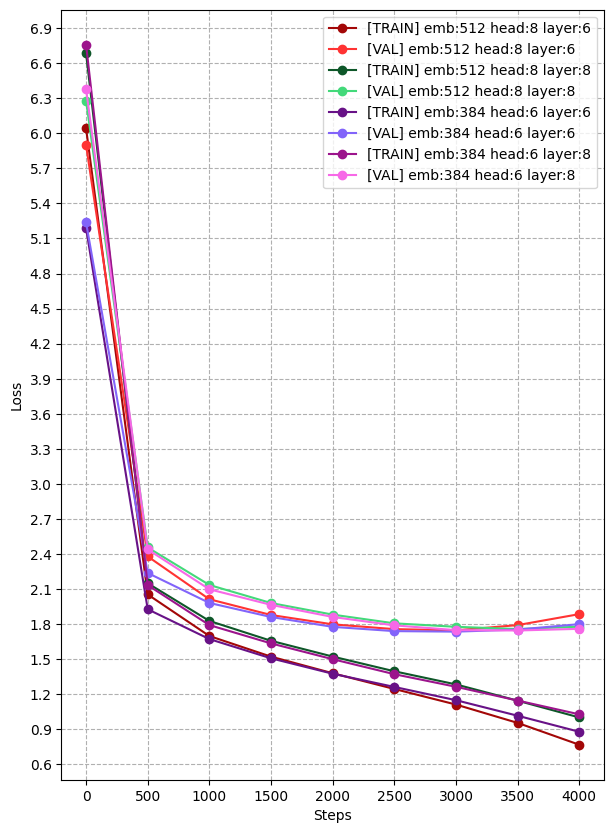

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_losses(loss_lists, labels):

    steps = range(0, 4500, 500)
    plt.figure(figsize=(7, 10))
    for losses, label, color in zip(loss_lists, labels, colors):
        plt.plot(steps, 
                 losses, 
                 marker='o', 
                 label=label, 
                 color=color)

    plt.xlabel('Steps')
    plt.ylabel('Loss')

    # plt.yticks(loss_lists[0])
    plt.gca().yaxis.set_major_locator(MultipleLocator(0.3))
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()

loss_lists = [
    # emb:512 head:8 layer:6 blocksize:256
    [6.0427, 2.0544, 1.6989, 1.5224, 1.3804, 1.2459, 1.1125, 0.9556, 0.7688],
    [5.9001, 2.3798, 2.0134, 1.8787, 1.7987, 1.7578, 1.7476, 1.7922, 1.8861],

    # emb:512 head:8 layer:8 blocksize:256
    [6.6845, 2.1501, 1.8279, 1.6580, 1.5231, 1.3972, 1.2849, 1.1456, 1.0023],
    [6.2800, 2.4563, 2.1355, 1.9811, 1.8819, 1.8074, 1.7776, 1.7585, 1.7788],

    # emb:384 head:6 layer:6 blocksize:256
    [5.1902, 1.9277, 1.6728, 1.508, 1.3763, 1.2632, 1.1498, 1.0169, 0.8796],
    [5.2375, 2.238, 1.9818, 1.8615, 1.7773, 1.7407, 1.7363, 1.7539, 1.8003],

    # n_embd: 384 n_head: 6 n_layer: 8 block_size: 256 // head-dim = 64.0
    [6.7577, 2.1341, 1.7923, 1.6357, 1.5007, 1.3724, 1.2645, 1.1468, 1.0288],
    [6.3785, 2.4396, 2.0986, 1.9656, 1.8620, 1.7900, 1.7493, 1.7461, 1.7604]

]
labels = ['[TRAIN] emb:512 head:8 layer:6', 
          '[VAL] emb:512 head:8 layer:6', 
 
          '[TRAIN] emb:512 head:8 layer:8',  
          '[VAL] emb:512 head:8 layer:8', 

          '[TRAIN] emb:384 head:6 layer:6',  
          '[VAL] emb:384 head:6 layer:6', 

          '[TRAIN] emb:384 head:6 layer:8',  
          '[VAL] emb:384 head:6 layer:8', 

          
          ]

colors = ['#a30707', '#ff3333',
          '#0e5729', '#43d97a',
          '#681287', '#8264fa',
          '#9c148c', '#f768e7',
        #   '#e35a10', '#f7a97e',
        #   '#10574c,','#95ede0'
          ]

plot_losses(loss_lists, labels)
